In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

import plotly 
import plotly.express as px
# from plotly import tools, subplots
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# cf.) function

In [2]:
def read_file(filename):
    df = pd.read_csv(f'./data/{filename}')
    if sum(df.duplicated(df.columns)) != 0:
        print(f"...There are {sum(df.duplicated(df.columns))} duplicates\n...Remove them")
        df = df.drop_duplicates()
    else:
        print("...There are no duplicates")
    df.name = filename
    print(f"shape of {df.name}: {df.shape}")
    return df

def check_NA(df):
    print(f"NA check")
    NA_res = df.isna().sum()
    if NA_res.sum() != 0:
        for idx, i in enumerate(NA_res):
            if i != 0:
                print(df.columns[idx],i,"->",round(i/df.shape[0]*100,3),"%")
    else:
        print("...There's no NA")

def dual_countplot(col, figsize=(14,8), pallete="Set2", flip=True):
    plt.rcParams["figure.figsize"] = figsize
    fig, ax = plt.subplots(ncols=2)
    if flip:
        sns.countplot(y=train[col],palette=pallete,order=train[col].unique(),ax=ax[0]).set_title("train")
        sns.countplot(y=test[col],palette=pallete,order=train[col].unique(),ax=ax[1]).set_title("test")
    else:
        sns.countplot(x=train[col],palette=pallete,order=train[col].unique(),ax=ax[0]).set_title("train")
        sns.countplot(x=test[col],palette=pallete,order=train[col].unique(),ax=ax[1]).set_title("test")
    plt.tight_layout()
    plt.show()

**Problem** <br>
▶**단지코드별 등록차량수를 predict하는 regression 문제**

**Evaluation** <br>
▶**MAE**

# Data info
## train & test
0. 단지코드
1. 총세대수
2. 임대건물구분
3. 지역
4. 공급유형
5. 전용면적
6. 전용면적별세대수
7. 공가수
8. 자격유형
9. 임대보증금
10. 임대료
11. 도보 10분거리 내 지하철역 수(환승노선 수 반영)
12. 도보 10분거리 내 버스정류장 수
13. 단지내주차면수
14. 등록차량수

## duplicates 제거 & column명 변경

In [3]:
train = read_file('train.csv')
test = read_file('test.csv')
age_gender = read_file('age_gender_info.csv')

...There are 320 duplicates
...Remove them
shape of train.csv: (2632, 15)
...There are 73 duplicates
...Remove them
shape of test.csv: (949, 14)
...There are no duplicates
shape of age_gender_info.csv: (16, 23)


In [4]:
print(train.columns)
print(test.columns)
print(age_gender.columns)

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')
Index(['지역', '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)',
       '20대(남자)', '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)',
       '50대(남자)', '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)',
       '80대(남자)', '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')


In [5]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수']
test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수']

# new_age_gender_col = ['지역', '0F', '0M']
# for i in age_gender.columns[3:]:
#     if '여' in i.split('대')[1]:
#         col = i.split('대')[0]+"F"
#     else:
#         col = i.split('대')[0]+"M"
#     new_age_gender_col.append(col)
# age_gender.columns = new_age_gender_col


print(train.columns)
print(test.columns)
print(age_gender.columns)

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수'],
      dtype='object')
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수'],
      dtype='object')
Index(['지역', '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)',
       '20대(남자)', '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)',
       '50대(남자)', '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)',
       '80대(남자)', '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')


## datatype 변경
1) categorical
- 단지코드
- 임대건물구분
- 지역
- 공급유형
- 자격유형

2) numerical
- 총세대수
- 전용면적
- 전용면적별세대수
- 공가수
- **임대보증금: "-" -> NA 처리 후 numeric으로 변경**
- **임대료: "-" -> NA 처리 후 numeric으로 변경**
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수

In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2632 non-null   object 
 1   총세대수      2632 non-null   int64  
 2   임대건물구분    2632 non-null   object 
 3   지역        2632 non-null   object 
 4   공급유형      2632 non-null   object 
 5   전용면적      2632 non-null   float64
 6   전용면적별세대수  2632 non-null   int64  
 7   공가수       2632 non-null   float64
 8   자격유형      2632 non-null   object 
 9   임대보증금     2340 non-null   object 
 10  임대료       2340 non-null   object 
 11  지하철역      2477 non-null   float64
 12  버스정류장     2628 non-null   float64
 13  단지내주차면수   2632 non-null   float64
 14  등록차량수     2632 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 329.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ------

In [7]:
train.select_dtypes(exclude='number')

,단지코드,임대건물구분,지역,공급유형,자격유형,임대보증금,임대료
0,C2483,아파트,경상북도,국민임대,A,15667000,103680
1,C2483,아파트,경상북도,국민임대,A,15667000,103680
2,C2483,아파트,경상북도,국민임대,A,27304000,184330
3,C2483,아파트,경상북도,국민임대,A,27304000,184330
4,C2483,아파트,경상북도,국민임대,A,27304000,184330
...,...,...,...,...,...,...,...
2947,C2532,아파트,강원도,국민임대,A,11346000,116090
2948,C2532,아파트,강원도,국민임대,A,14005000,142310
2949,C2532,아파트,강원도,국민임대,A,14005000,142310
2950,C2532,아파트,강원도,국민임대,A,14005000,142310


In [8]:
train.임대료.value_counts()

-         21
390000    19
79980     16
100920    16
151110    14
          ..
160100     1
74770      1
233010     1
368190     1
139980     1
Name: 임대료, Length: 995, dtype: int64

In [9]:
for col in ['임대료','임대보증금']:
    train[col] = train[col].replace('-',np.nan)
    train[col].fillna(-1,inplace=True)
    train[col] = train[col].astype('float')
    train[col] = train[col].replace(-1,np.nan)

for col in ['임대료','임대보증금']:
    test[col] = test[col].replace('-',np.nan)
    test[col].fillna(-1,inplace=True)
    test[col] = test[col].astype('float')
    test[col] = test[col].replace(-1,np.nan)

In [10]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2632 non-null   object 
 1   총세대수      2632 non-null   int64  
 2   임대건물구분    2632 non-null   object 
 3   지역        2632 non-null   object 
 4   공급유형      2632 non-null   object 
 5   전용면적      2632 non-null   float64
 6   전용면적별세대수  2632 non-null   int64  
 7   공가수       2632 non-null   float64
 8   자격유형      2632 non-null   object 
 9   임대보증금     2328 non-null   float64
 10  임대료       2319 non-null   float64
 11  지하철역      2477 non-null   float64
 12  버스정류장     2628 non-null   float64
 13  단지내주차면수   2632 non-null   float64
 14  등록차량수     2632 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 329.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ------

In [11]:
num_col = train.select_dtypes(include='number').columns.tolist()
obj_col = train.select_dtypes(exclude='number').columns.tolist()
print(f"numerical features: {num_col}")
print(f"categorical feature: {obj_col}")

numerical features: ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수']
categorical feature: ['단지코드', '임대건물구분', '지역', '공급유형', '자격유형']


## NA 확인
- 임대보증금&임대료
- 지하철역&버스정류장
- 자격유형

In [12]:
check_NA(train)
check_NA(test)
check_NA(age_gender)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
자격유형 2 -> 0.211 %
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %
NA check
...There's no NA


In [13]:
raw_train = deepcopy(train)
raw_test = deepcopy(test)
raw_age_gender = deepcopy(age_gender)

# EDA
## age_gender_info

In [14]:
age = age_gender.set_index('지역')

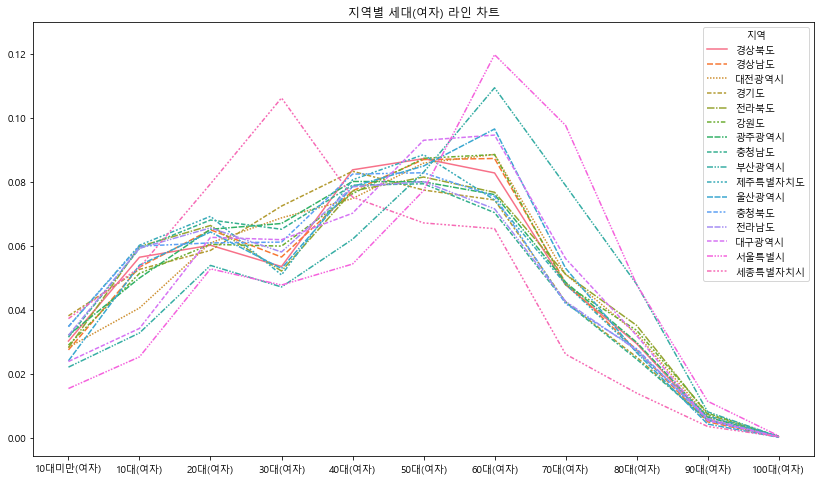

In [15]:
plt.rcParams["figure.figsize"] = (14,8)
sns.lineplot(data=age.loc[:, age.columns.str.contains('여자')].T)
plt.title('지역별 세대(여자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

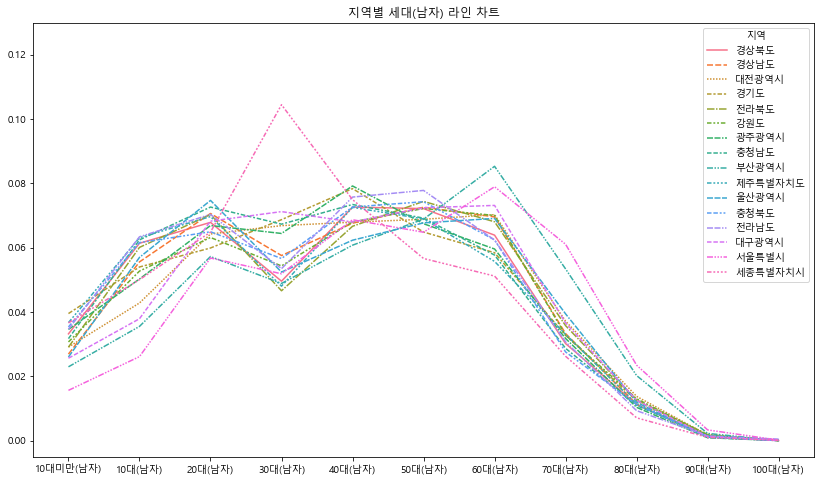

In [16]:
plt.rcParams["figure.figsize"] = (14,8)
sns.lineplot(data=age.loc[:, age.columns.str.contains('남자')].T)
plt.title('지역별 세대(남자) 라인 차트')
plt.ylim(top=0.13)
plt.show()

## train & test
**categorical feature**
- 단지코드
- 지역
- 공급유형
- 자격유형
- 임대건물구분

### 단지코드
▶ 단지코드별로 그룹화했을 때 nonunique column들이 있음
- 자격유형, 공급유형, 임대건물구분
- 임대보증금, 임대료, 전용면적, 전용면적별세대수

▶ <font color="red">nonunique column 전처리 후 단지코드별로 그룹화해야 함</font>

In [17]:
comp_groupby = train.groupby(['단지코드']).nunique(dropna=False) # count NA values
comp_groupby

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1000,1,1,1,1,5,6,1,1,3,3,1,1,1,1
C1004,1,2,1,2,15,3,1,2,3,3,1,1,1,1
C1005,1,1,1,1,3,3,1,1,3,3,1,1,1,1
C1013,1,1,1,1,4,5,1,1,3,3,1,1,1,1
C1014,1,1,1,1,6,7,1,1,4,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,5,6,1,1,4,4,1,1,1,1
C2666,1,1,1,1,4,6,1,1,2,2,1,1,1,1
C2670,1,1,1,1,4,3,1,1,3,3,1,1,1,1


In [18]:
print(comp_groupby.sum())
unique_col = [comp_groupby.sum().index[idx] for (idx, i) in enumerate(comp_groupby.sum()) if i == 423]
nonunique_col =  [comp_groupby.sum().index[idx] for (idx, i) in enumerate(comp_groupby.sum()) if i != 423]
print(f"unique_col: {unique_col}")
print(f"nonunique_col: {nonunique_col}")

총세대수         423
임대건물구분       456
지역           423
공급유형         488
전용면적        1898
전용면적별세대수    2230
공가수          423
자격유형         510
임대보증금       1277
임대료         1289
지하철역         423
버스정류장        423
단지내주차면수      423
등록차량수        423
dtype: int64
unique_col: ['총세대수', '지역', '공가수', '지하철역', '버스정류장', '단지내주차면수', '등록차량수']
nonunique_col: ['임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']


### 지역
▶ test에는 서울특별시 X

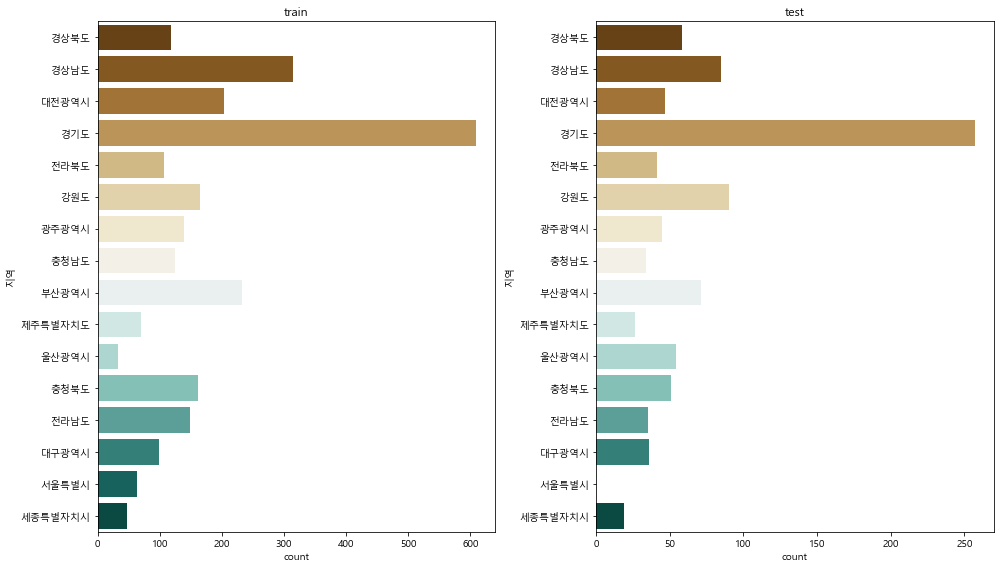

In [19]:
dual_countplot("지역", pallete="BrBG")

지역별 등록차량수 & 단지내주차면수

In [20]:
train['등록차량수'].groupby(train['지역']).median()

지역
강원도         333.0000
경기도         752.0000
경상남도        479.0000
경상북도        562.0000
광주광역시       713.0000
대구광역시       744.0000
대전광역시       373.0000
부산광역시       345.0000
서울특별시       793.0000
세종특별자치시   1,524.0000
울산광역시       417.0000
전라남도        408.0000
전라북도        415.0000
제주특별자치도     358.0000
충청남도        209.0000
충청북도        553.0000
Name: 등록차량수, dtype: float64

In [21]:
train['등록차량수'].groupby(train['지역']).median().reset_index()

,지역,등록차량수
0,강원도,333.0000
1,경기도,752.0000
2,경상남도,479.0000
3,경상북도,562.0000
4,광주광역시,713.0000
5,대구광역시,744.0000
6,대전광역시,373.0000
7,부산광역시,345.0000
8,서울특별시,793.0000
9,세종특별자치시,"1,524.0000"


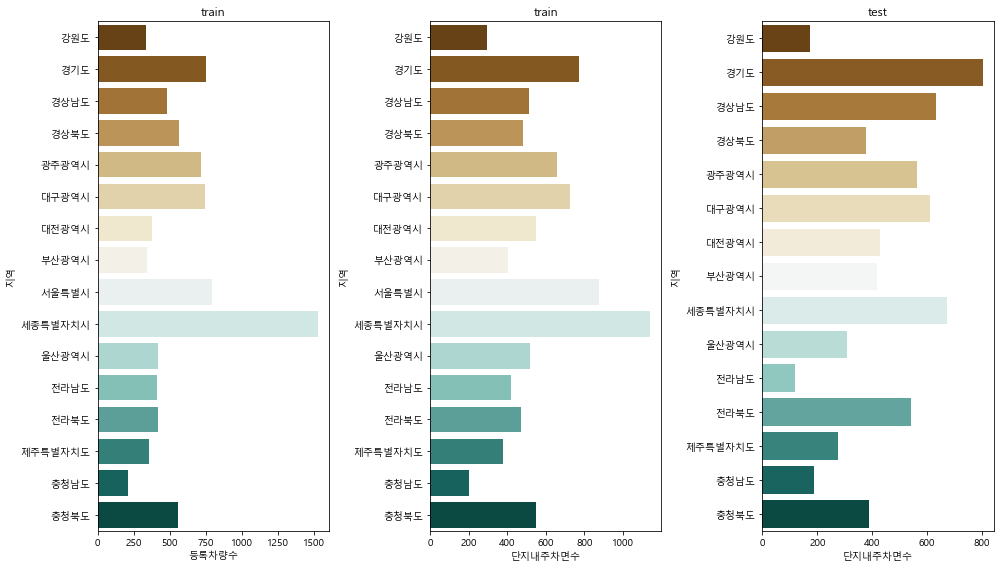

In [22]:
col = "단지내주차면수"
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=3)
sns.barplot(data=train["등록차량수"].groupby(train['지역']).median().reset_index(),
            y="지역", x="등록차량수", palette="BrBG", ax=ax[0]).set_title("train")
sns.barplot(data=train[col].groupby(train['지역']).median().reset_index(),
            y="지역", x=f"{col}", palette="BrBG", ax=ax[1]).set_title("train")
sns.barplot(data=test[col].groupby(test['지역']).median().reset_index(),
            y="지역", x=f"{col}", palette="BrBG", ax=ax[2]).set_title("test")
plt.tight_layout()
plt.show()

### 자격유형 & 공급유형
▶test set에 없는 자격유형 - B, F, O

▶<font color="red">자격유형_카테고리 column 추가</font> <br>

In [23]:
print(train.자격유형.nunique())
print(test.자격유형.nunique())
print("test에 없는 자격유형")
print(*set(train.자격유형.unique())-set(test.자격유형.unique()), sep=" ")

15
12
test에 없는 자격유형
F B O


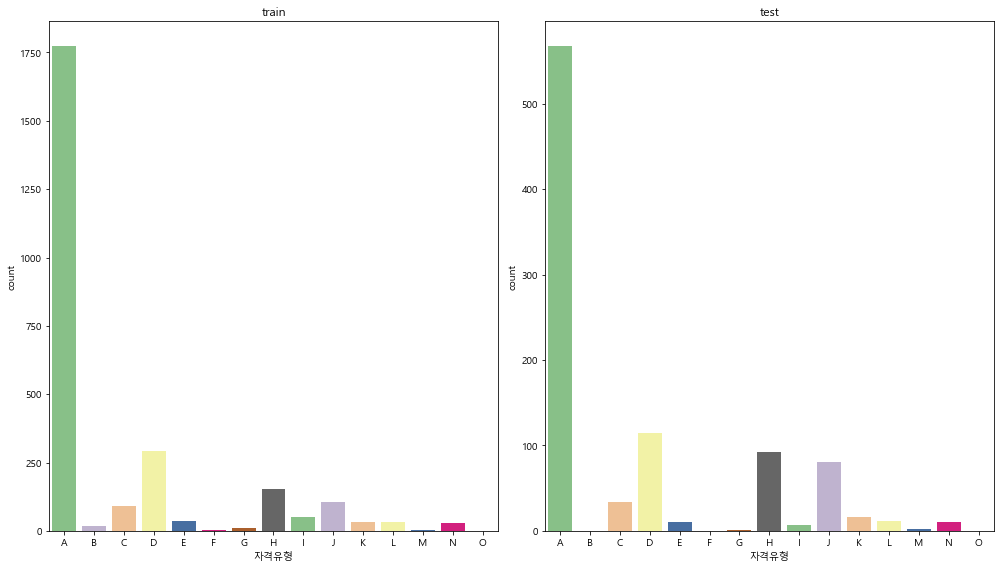

In [24]:
dual_countplot("자격유형", flip=False, pallete="Accent")

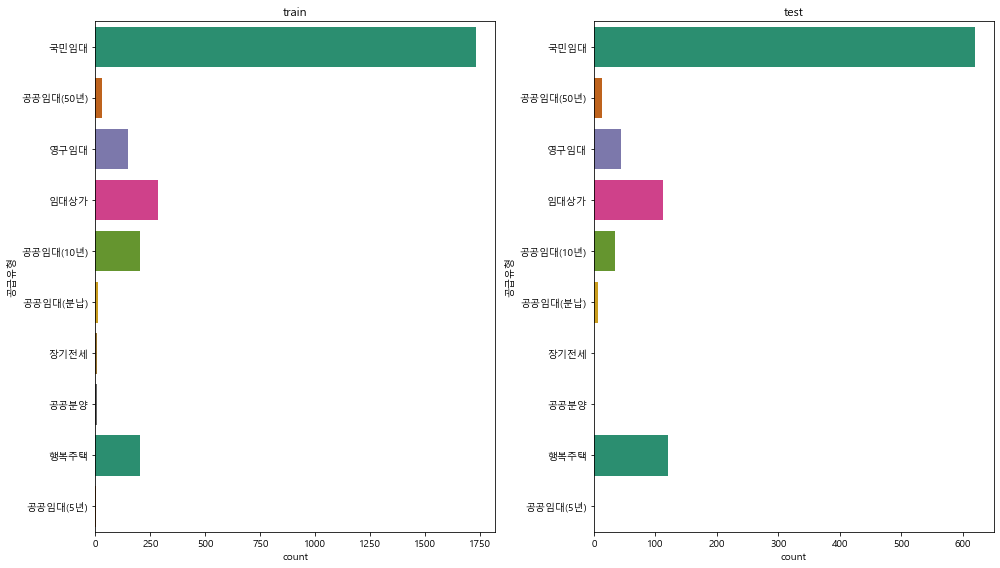

In [25]:
dual_countplot("공급유형", pallete="Dark2")

#### NA imputation
**해당 단지코드에 위치한 동일 임대건물구분의 자격유형으로 대체**

In [26]:
test.loc[test.자격유형.isna(),'단지코드']

196    C2411
258    C2253
Name: 단지코드, dtype: object

In [27]:
test.loc[test.단지코드=="C2411",:]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.4300,56,25.0000,A,"11,992,000.0000","100,720.0000",0.0000,2.0000,840.0000
194,C2411,962,아파트,경상남도,국민임대,39.7200,336,25.0000,A,"11,992,000.0000","100,720.0000",0.0000,2.0000,840.0000
195,C2411,962,아파트,경상남도,국민임대,39.8200,179,25.0000,A,"11,992,000.0000","100,720.0000",0.0000,2.0000,840.0000
196,C2411,962,아파트,경상남도,국민임대,46.9000,240,25.0000,NaN,"71,950,000.0000","37,470.0000",0.0000,2.0000,840.0000
197,C2411,962,아파트,경상남도,국민임대,51.9300,150,25.0000,A,"21,586,000.0000","171,480.0000",0.0000,2.0000,840.0000


In [28]:
test.loc[test.단지코드=="C2253",:]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.3700,745,0.0000,NaN,"2,249,000.0000","44,770.0000",0.0000,2.0000,173.0000
259,C2253,1161,아파트,강원도,영구임대,31.3200,239,0.0000,C,"3,731,000.0000","83,020.0000",0.0000,2.0000,173.0000
260,C2253,1161,아파트,강원도,영구임대,31.3200,149,0.0000,C,"3,731,000.0000","83,020.0000",0.0000,2.0000,173.0000
261,C2253,1161,상가,강원도,임대상가,13.7700,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000
262,C2253,1161,상가,강원도,임대상가,22.8900,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000
263,C2253,1161,상가,강원도,임대상가,22.9100,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000
264,C2253,1161,상가,강원도,임대상가,23.7900,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000
266,C2253,1161,상가,강원도,임대상가,23.8600,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000
268,C2253,1161,상가,강원도,임대상가,24.1900,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000
269,C2253,1161,상가,강원도,임대상가,27.7500,1,0.0000,D,NaN,NaN,0.0000,2.0000,173.0000


In [29]:
test.loc[(test.단지코드=='C2411')&(test.자격유형.isna()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isna()), '자격유형'] = 'C'

In [30]:
check_NA(train)
check_NA(test)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %


#### 자격유형_카테고리
전용면적을 기준으로 clustering
- train set

In [31]:
for i in train['자격유형'].unique():
    print(i,train[train['자격유형']==i]['공급유형'].unique())

A ['국민임대' '공공임대(50년)' '공공임대(10년)' '공공임대(분납)' '장기전세' '영구임대' '공공임대(5년)']
B ['국민임대']
C ['영구임대']
D ['임대상가' '공공분양']
E ['영구임대' '국민임대']
F ['영구임대']
G ['국민임대']
H ['국민임대']
I ['영구임대']
J ['행복주택']
K ['행복주택']
L ['행복주택']
M ['행복주택']
N ['행복주택']
O ['행복주택']


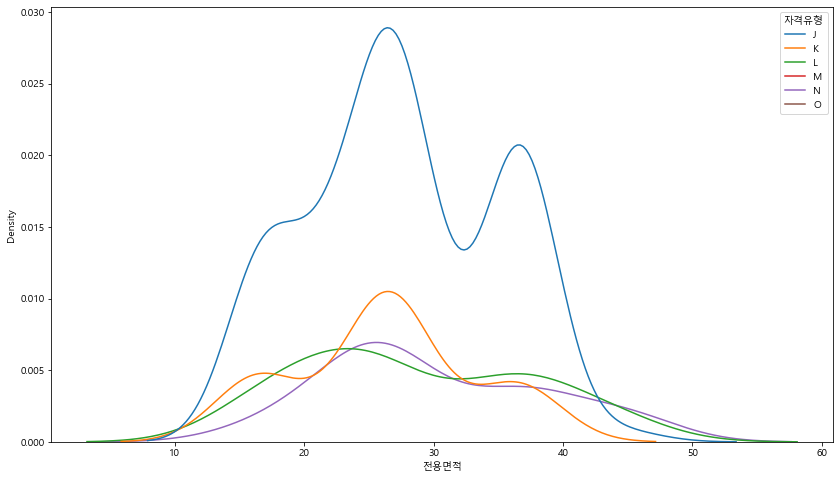

In [32]:
tmp = train[train['공급유형']=='행복주택']
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')
plt.show()

- J / K L M N O

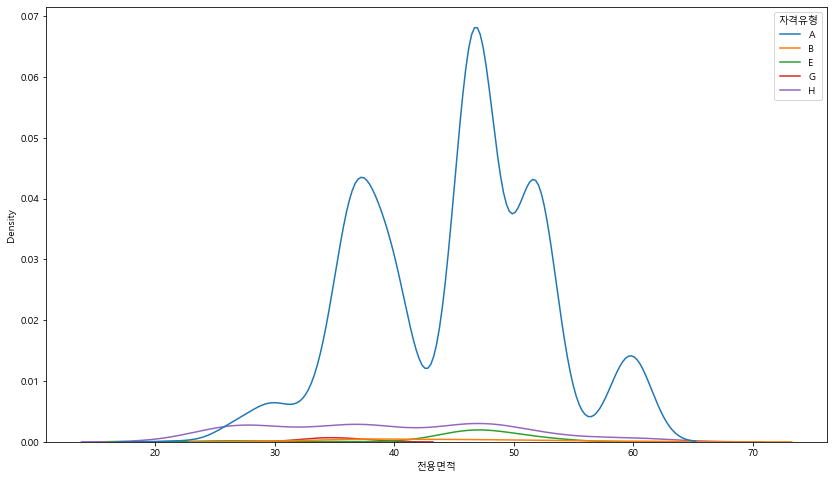

In [33]:
tmp = train[train['공급유형']=='국민임대']
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')
plt.show()

- A / B E G H

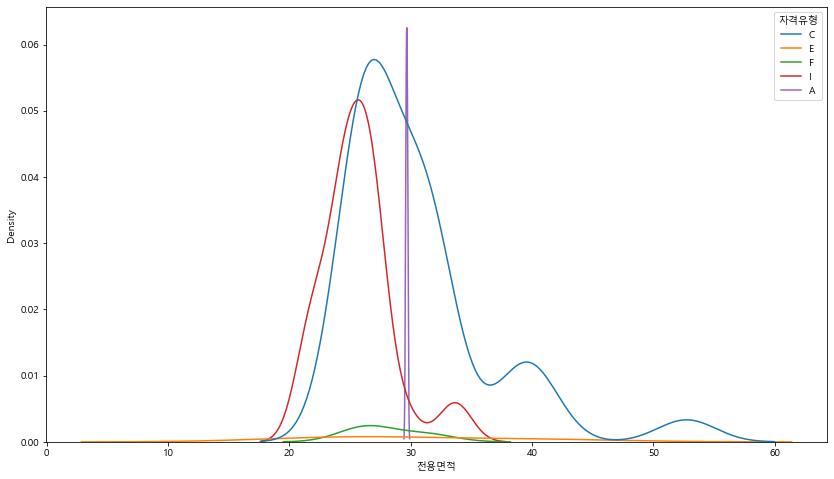

In [34]:
tmp = train[train['공급유형']=='영구임대']
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')
plt.show()

- C / I / A / E F

In [35]:
# J / K L M N O / A / B E G H / C / I / E F 

In [36]:
dic = {'1': 'A' ,'2':['B','E','G','H'],'3':['E','F'],'4':'I','5':['K','L','M','N','O'],'6':'J','7':'C','8':'D'}

In [37]:
def category2(x):
    for i in dic.keys():
        if x in dic[i]:
            return int(i)

In [38]:
train['자격유형_카테고리'] = train['자격유형'].apply(lambda x : category2(x))

In [39]:
sample = pd.DataFrame(train.groupby('단지코드')['자격유형_카테고리'].unique()).reset_index()
sample.head()

,단지코드,자격유형_카테고리
0,C1000,[1]
1,C1004,"[7, 8]"
2,C1005,[1]
3,C1013,[1]
4,C1014,[1]


In [40]:
for i in dic.keys():
    train['자격유형'+str(i)]=0

In [41]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val = sample.loc[i,'자격유형_카테고리']
    ind = train[train['단지코드']==code].index
    for j in val:
        train.loc[ind,'자격유형'+str(j)] = 1

- test set

In [42]:
for i in test['자격유형'].unique():
    print(i,test[test['자격유형']==i]['공급유형'].unique())

H ['국민임대']
A ['국민임대' '공공임대(50년)' '공공임대(10년)' '공공임대(분납)']
E ['국민임대']
C ['영구임대']
D ['영구임대' '임대상가']
G ['국민임대']
I ['영구임대']
J ['행복주택']
K ['행복주택']
L ['행복주택']
M ['행복주택']
N ['행복주택']


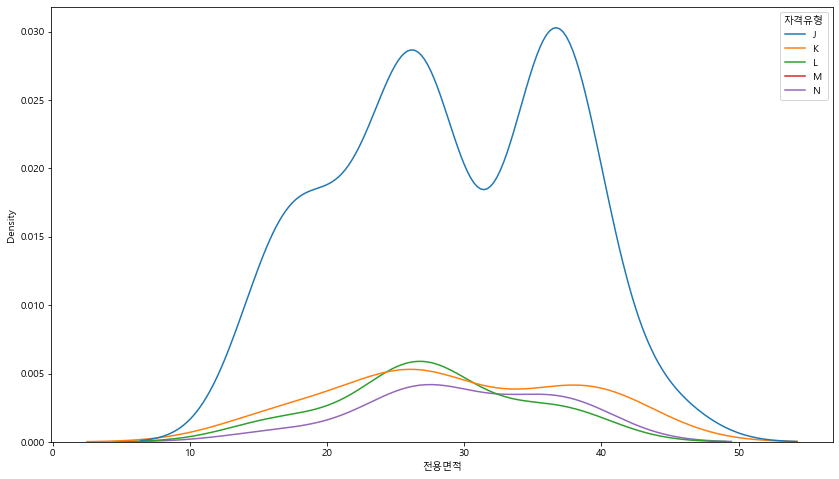

In [43]:
tmp = test[test['공급유형']=='행복주택']
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')
plt.show()

- J / K L M N

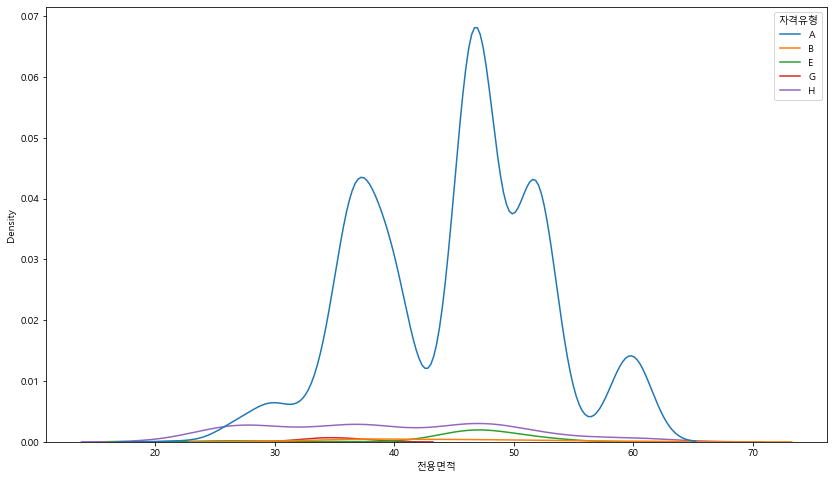

In [44]:
tmp = train[train['공급유형']=='국민임대']
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')
plt.show()

- A / B E G H

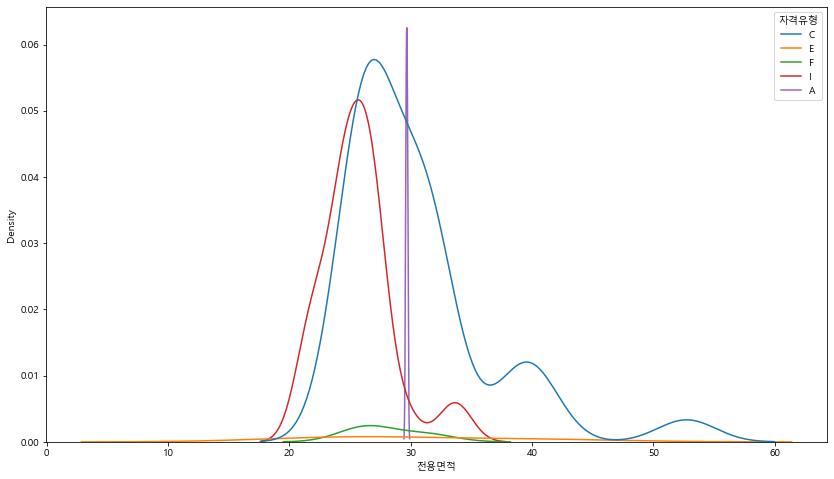

In [45]:
tmp = train[train['공급유형']=='영구임대']
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')
plt.show()

- C / I / A / E F

In [46]:
# J / K L M N / A / E G H / C / I / E 

In [47]:
dic = {'1': 'A' ,'2':['E','G','H'],'3':['E'],'4':'I','5':['K','L','M','N'],'6':'J','7':'C','8':'D'}

In [48]:
test['자격유형_카테고리'] = test['자격유형'].apply(lambda x : category2(x))

In [49]:
sample = pd.DataFrame(test.groupby('단지코드')['자격유형_카테고리'].unique()).reset_index()
sample.head()

,단지코드,자격유형_카테고리
0,C1003,[6]
1,C1006,"[7, 8]"
2,C1016,[1]
3,C1019,[1]
4,C1030,[6]


In [50]:
for i in dic.keys():
    test['자격유형'+str(i)]=0

In [51]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val = sample.loc[i,'자격유형_카테고리']
    ind = test[test['단지코드']==code].index
    for j in val:
        test.loc[ind,'자격유형'+str(j)] = 1

### 임대건물구분
▶상가만 있는 단지는 X

▶<font color="red">상가비율 column 추가</font> <br>

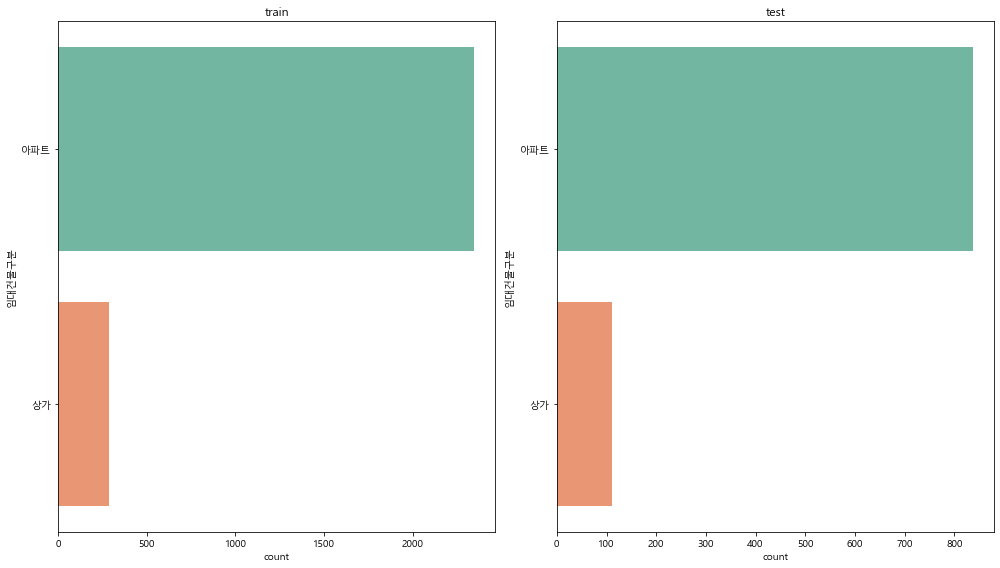

In [52]:
dual_countplot("임대건물구분")

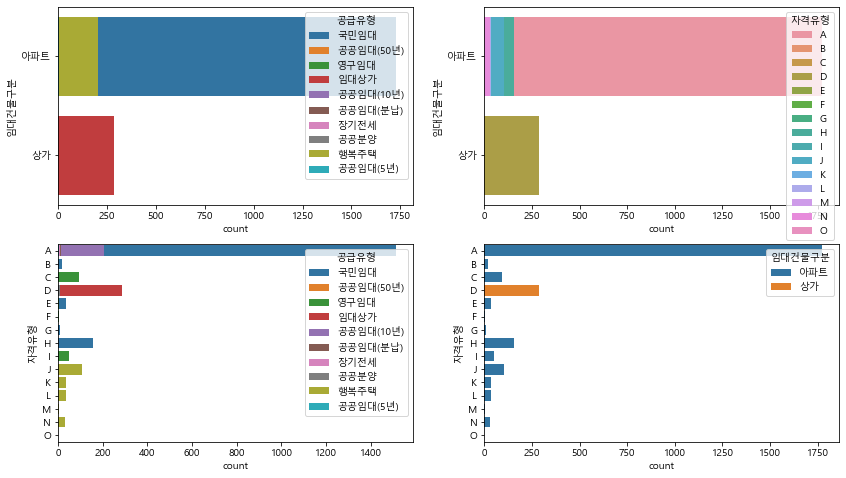

In [53]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.countplot(y='임대건물구분', hue='공급유형', data=train, dodge=False, ax=ax[0,0])
sns.countplot(y='임대건물구분', hue='자격유형', data=train, dodge=False, ax=ax[0,1])
sns.countplot(y='자격유형', hue='공급유형', data=train, dodge=False, ax=ax[1,0])
sns.countplot(y='자격유형', hue='임대건물구분', data=train, dodge=False, ax=ax[1,1])
plt.show()

In [54]:
train_cls = pd.concat([train[['단지코드']], pd.get_dummies(train[['임대건물구분']])], axis=1).groupby('단지코드').sum()
train_cls.loc[train_cls.임대건물구분_아파트==0,]

,임대건물구분_상가,임대건물구분_아파트
단지코드,,


In [55]:
print(f"상가가 없는 단지: {train_cls.loc[train_cls.임대건물구분_상가==0,].shape[0]}")
print(f"상가가 있는 단지: {train_cls.loc[train_cls.임대건물구분_상가!=0,].shape[0]}")
print(f"상가>아파트인 단지: {train_cls.loc[(train_cls.임대건물구분_상가!=0)&(train_cls.임대건물구분_상가>train_cls.임대건물구분_아파트),].shape[0]}")
print(f"상가=아파트인 단지: {train_cls.loc[(train_cls.임대건물구분_상가!=0)&(train_cls.임대건물구분_상가==train_cls.임대건물구분_아파트),].shape[0]}")
print(f"상가<아파트인 단지: {train_cls.loc[(train_cls.임대건물구분_상가!=0)&(train_cls.임대건물구분_상가<train_cls.임대건물구분_아파트),].shape[0]}")

상가가 없는 단지: 390
상가가 있는 단지: 33
상가>아파트인 단지: 20
상가=아파트인 단지: 6
상가<아파트인 단지: 7


In [56]:
train_cls.loc[train_cls.임대건물구분_상가!=0,].tail()

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C2416,8,2
C2571,2,1
C2597,15,3
C2621,3,6
C2644,2,4


In [57]:
tot = train_cls['임대건물구분_상가']+train_cls['임대건물구분_아파트']
train_cls['상가비율'] = train_cls['임대건물구분_상가']/tot
train_cls

,임대건물구분_상가,임대건물구분_아파트,상가비율
단지코드,,,
C1000,0,7,0.0000
C1004,13,2,0.8667
C1005,0,3,0.0000
C1013,0,5,0.0000
C1014,0,7,0.0000
...,...,...,...
C2663,0,6,0.0000
C2666,0,6,0.0000
C2670,0,5,0.0000


In [58]:
print(f"상업용 단지: {train_cls.loc[train_cls.상가비율>0.8,].shape[0]}")

상업용 단지: 13


In [59]:
train = pd.merge(train,train_cls[['상가비율']].reset_index(),on='단지코드')
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,등록차량수,자격유형_카테고리,자격유형1,자격유형2,자격유형3,자격유형4,자격유형5,자격유형6,자격유형7,자격유형8,상가비율
0,C2483,900,아파트,경상북도,국민임대,39.7200,134,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000
1,C2483,900,아파트,경상북도,국민임대,39.7200,15,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000
2,C2483,900,아파트,경상북도,국민임대,51.9300,385,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000
3,C2483,900,아파트,경상북도,국민임대,51.9300,15,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000
4,C2483,900,아파트,경상북도,국민임대,51.9300,41,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,C2532,239,아파트,강원도,국민임대,49.2000,19,7.0000,A,"11,346,000.0000","116,090.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000
2628,C2532,239,아파트,강원도,국민임대,51.0800,34,7.0000,A,"14,005,000.0000","142,310.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000
2629,C2532,239,아파트,강원도,국민임대,51.7300,34,7.0000,A,"14,005,000.0000","142,310.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000
2630,C2532,239,아파트,강원도,국민임대,51.9600,114,7.0000,A,"14,005,000.0000","142,310.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000


#### 상가비율
상가비율에 따라 상업용/주거용 단지 구분 가능
- train set

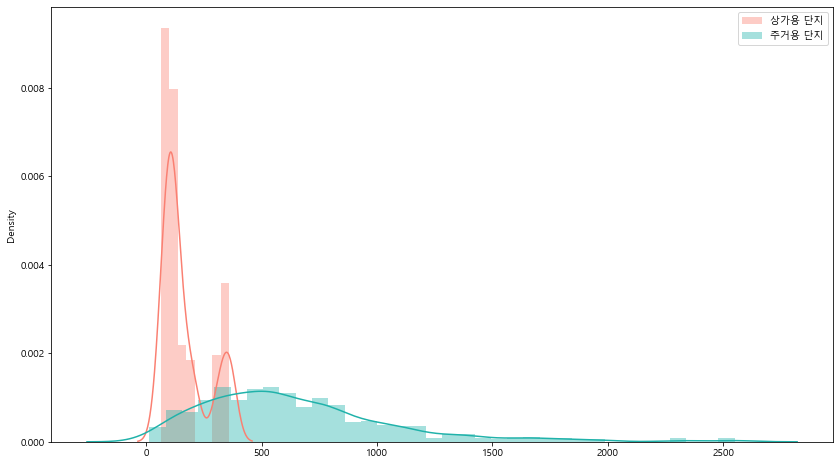

In [60]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(train.loc[train.상가비율>0.8,"등록차량수"], label="상가용 단지", color="salmon")
sns.distplot(train.loc[train.상가비율<0.8,"등록차량수"], label="주거용 단지", color="lightseagreen")
plt.xlabel('')
plt.legend()
plt.show()

- test set

In [61]:
test_cls = pd.concat([test[['단지코드']], pd.get_dummies(test[['임대건물구분']])], axis=1).groupby('단지코드').sum()
tot = test_cls['임대건물구분_상가']+test_cls['임대건물구분_아파트']
test_cls['상가비율'] = test_cls['임대건물구분_상가']/tot
test = pd.merge(test,test_cls[['상가비율']].reset_index(),on='단지코드')

**numerical feature**
- 임대료 & 임대보증금
- 총세대수& 전용면적별세대수
- 공가수
- 지하철역 & 버스정류장
- 단지내주차면수
- 전용면적
- 등록차량수

### 임대료 & 임대보증금 
▶ train set에서 임대보증금만 NA인 건물은 9개 <br>
그 외에는 임대료 & 임대보증금 모두 NA

▶ test set에서 임대료가 NA인 건물은 임대보증금이 NA인 건물과 동일

▶ <font color="red">공공분양은 0으로 대체</font> 

▶ 지역별 가중치 <br>
ex: 강원도같은 경우는 평균치를 넣고 서울은 이것의 1.5배로 설정

In [62]:
check_NA(train)
check_NA(test)

NA check
임대보증금 304 -> 11.55 %
임대료 313 -> 11.892 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %


In [63]:
sum(test.loc[test.임대료.isna(),:].index!=test.loc[test.임대보증금.isna(),:].index)

0

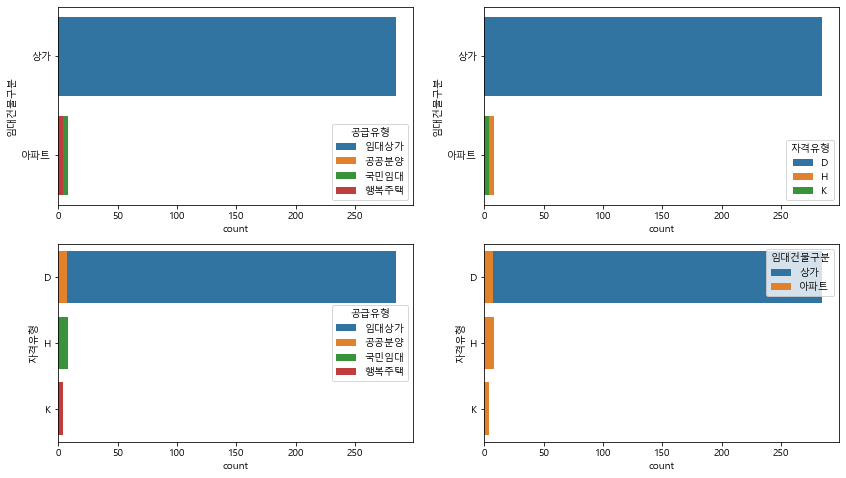

In [64]:
# train: 임대료와 임대보증금이 NA인 건물
tmp = train.loc[(train.임대료.isna())&(train.임대보증금.isna()),:]
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.countplot(y='임대건물구분', hue='공급유형', data=tmp, dodge=False, ax=ax[0,0])
sns.countplot(y='임대건물구분', hue='자격유형', data=tmp, dodge=False, ax=ax[0,1])
sns.countplot(y='자격유형', hue='공급유형', data=tmp, dodge=False, ax=ax[1,0])
sns.countplot(y='자격유형', hue='임대건물구분', data=tmp, dodge=False, ax=ax[1,1])
plt.show()

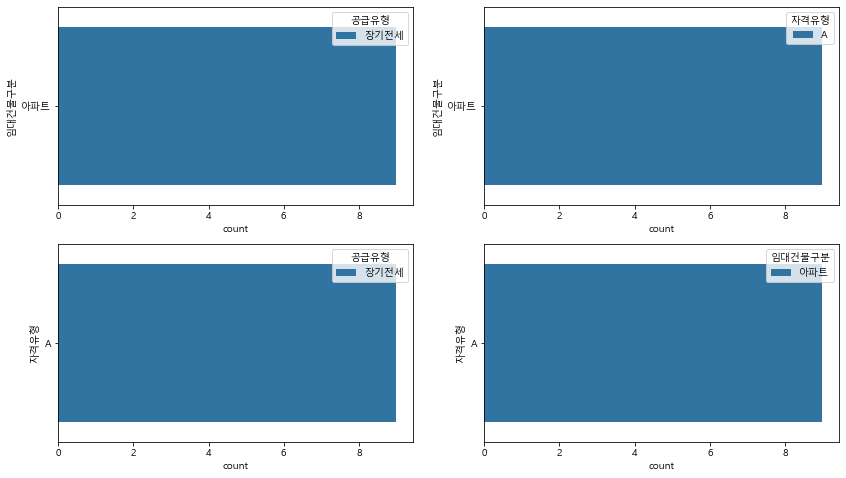

In [65]:
# train: 임대보증금만 NA인 건물
tmp = train.loc[(train.임대료.isna())&(~train.임대보증금.isna()),:]
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.countplot(y='임대건물구분', hue='공급유형', data=tmp, dodge=False, ax=ax[0,0])
sns.countplot(y='임대건물구분', hue='자격유형', data=tmp, dodge=False, ax=ax[0,1])
sns.countplot(y='자격유형', hue='공급유형', data=tmp, dodge=False, ax=ax[1,0])
sns.countplot(y='자격유형', hue='임대건물구분', data=tmp, dodge=False, ax=ax[1,1])
plt.show()

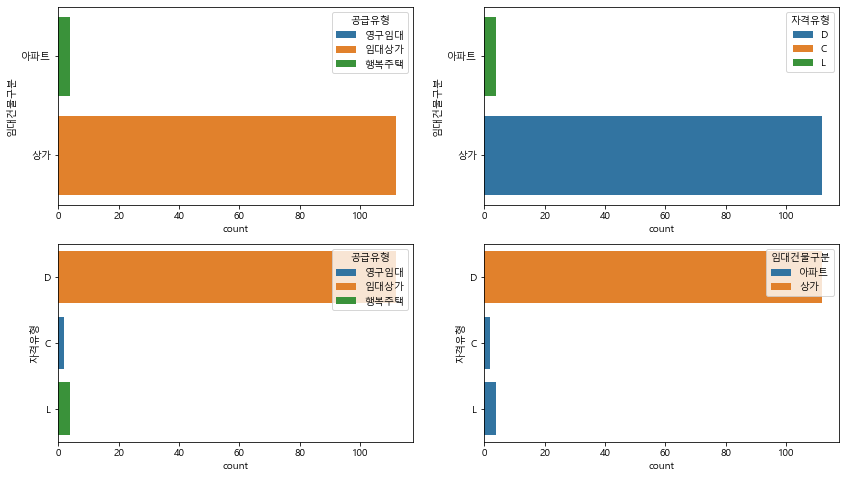

In [66]:
# test: 임대료와 임대보증금이 NA인 건물
tmp = test.loc[test.임대보증금.isna(),]
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.countplot(y='임대건물구분', hue='공급유형', data=tmp, dodge=False, ax=ax[0,0])
sns.countplot(y='임대건물구분', hue='자격유형', data=tmp, dodge=False, ax=ax[0,1])
sns.countplot(y='자격유형', hue='공급유형', data=tmp, dodge=False, ax=ax[1,0])
sns.countplot(y='자격유형', hue='임대건물구분', data=tmp, dodge=False, ax=ax[1,1])
plt.show()

#### NA imputation
▶ 공공분양은 0으로 대체

In [67]:
train.loc[(train.임대료.isna())&(train.공급유형=="공공분양"),'임대료'] = 0
train.loc[(train.임대보증금.isna())&(train.공급유형=="공공분양"),'임대보증금'] = 0

▶ 동일한 단지코드인 아파트 임대료, 임대보증금 평균 값을 사용해서 NA imputation

cf.) 다른 외부 데이터를 이용해서 주상복합에 속한 아파트, 상가의 보증금 관계를 살펴보는 것도 하나의 방법

- train set

**Step 1. 단지코드별 평균으로 대체<font>**

In [68]:
check_NA(train)

NA check
임대보증금 297 -> 11.284 %
임대료 306 -> 11.626 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %


In [69]:
def get_values(data, code, col):
    df = data[(data['단지코드']==code)&(data[col].isna()==False)]
    return df[col].values.mean()

In [70]:
def impute_by_code(data, col):
    code = data[data[col].isna()==True]['단지코드'].unique()
    print(f"{col}에 NA가 있는 단지코드: {code}")
    print(f"{col}이(가) 모두 NA인 단지코드:")
    for i in code:
        n = data[(data['단지코드']==i)&(data[col].isna()==False)].shape[0]
        ind = data[(data['단지코드']==i)&(data[col].isna()==True)].index
        if n==0 :
            print(i)
        if n != 0 :
            data.loc[ind,col] = get_values(data, i, col)
    return data

In [71]:
# 임대료 NA impute
train = impute_by_code(train, '임대료')

임대료에 NA가 있는 단지코드: ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571' 'C1397' 'C1039' 'C1326'
 'C1786' 'C2186']
임대료이(가) 모두 NA인 단지코드:
C1397
C1326


In [72]:
# 임대보증금 NA impute
train = impute_by_code(train, '임대보증금')

임대보증금에 NA가 있는 단지코드: ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571' 'C1326' 'C1786' 'C2186']
임대보증금이(가) 모두 NA인 단지코드:
C1326


In [73]:
check_NA(train)

NA check
임대보증금 5 -> 0.19 %
임대료 11 -> 0.418 %
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %


**Step2. 모두 NA인 경우 해당 단지코드의 지역과 공급유형이 동일한 단지코드의 평균으로 대체**

In [74]:
train[train['단지코드']=='C1326'][['지역','공급유형']].values[0]

array(['부산광역시', '국민임대'], dtype=object)

In [75]:
train[train['단지코드']=='C1397'][['지역','공급유형']].values[0]

array(['서울특별시', '장기전세'], dtype=object)

In [76]:
# C1326
m = train[(train['지역']=='서울특별시')&(train['공급유형']=='장기전세')&(train['임대료'].isna()==False)]['임대료'].values.mean()
train.loc[train['단지코드']=='C1397','임대료'] = m
# C1397
m1 = train[(train['지역']=='부산광역시')&(train['공급유형']=='국민임대')&(train['임대료'].isna()==False)]['임대료'].values.mean()
m2 = train[(train['지역']=='부산광역시')&(train['공급유형']=='국민임대')&(train['임대보증금'].isna()==False)]['임대보증금'].values.mean()
train.loc[train['단지코드']=='C1326','임대료'] = m1
train.loc[train['단지코드']=='C1326','임대보증금'] = m2

In [77]:
check_NA(train)

NA check
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %


- test set

In [78]:
check_NA(test)

NA check
임대보증금 120 -> 12.645 %
임대료 120 -> 12.645 %
지하철역 34 -> 3.583 %


In [79]:
# 임대료 NA impute
test = impute_by_code(test, '임대료')

임대료에 NA가 있는 단지코드: ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729' 'C2152' 'C1267']
임대료이(가) 모두 NA인 단지코드:
C2152


In [80]:
# 임대보증금 NA impute
test = impute_by_code(test, '임대보증금')

임대보증금에 NA가 있는 단지코드: ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729' 'C2152' 'C1267']
임대보증금이(가) 모두 NA인 단지코드:
C2152


In [81]:
test[test['단지코드']=='C2152'][['지역','공급유형']].values[0]

array(['강원도', '영구임대'], dtype=object)

In [82]:
# C2152
m = test[(test['지역']=='강원도')&(test['공급유형']=='영구임대')&(test['임대료'].isna()==False)]['임대료'].values.mean()
test.loc[test['단지코드']=='C2152','임대료'] = m
test.loc[test['단지코드']=='C2152','임대보증금'] = m

In [83]:
check_NA(test)

NA check
지하철역 34 -> 3.583 %


### 총세대수 & 전용면적별세대수
- 전용면적별세대수 = '임대'아파트 
- 총세대수 = '임대'아파트 + '분양'아파트

▶임대아파트가 분양되거나 단지 내 상가가 분양된 경우 전용면적별세대수의 합과 총세대수가 분양된 수만큼 차이가 남

▶분양세대수 column 추가? - X

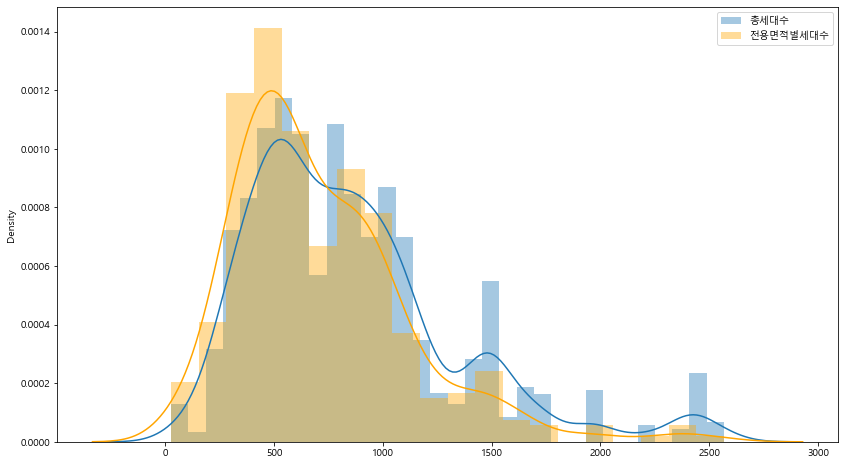

In [84]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(a=train['총세대수'], label='총세대수')
sns.distplot(a=train.groupby(['단지코드']).sum()['전용면적별세대수'], label='전용면적별세대수',color="orange")
plt.xlabel('')
plt.legend()
plt.show()

In [85]:
train_sale = pd.DataFrame(train.groupby(['단지코드']).first()['총세대수'] - train.groupby(['단지코드']).sum()['전용면적별세대수'])
train_sale.columns = ["분양세대수"]
train_sale = train_sale.astype('int16')
train_sale.reset_index(inplace=True)
train_sale

,단지코드,분양세대수
0,C1000,0
1,C1004,4
2,C1005,0
3,C1013,0
4,C1014,0
...,...,...
418,C2663,0
419,C2666,0
420,C2670,0
421,C2680,0


In [86]:
train = pd.merge(train, train_sale,on="단지코드")
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,등록차량수,자격유형_카테고리,자격유형1,자격유형2,자격유형3,자격유형4,자격유형5,자격유형6,자격유형7,자격유형8,상가비율,분양세대수
0,C2483,900,아파트,경상북도,국민임대,39.7200,134,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000,0
1,C2483,900,아파트,경상북도,국민임대,39.7200,15,38.0000,A,"15,667,000.0000","103,680.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000,0
2,C2483,900,아파트,경상북도,국민임대,51.9300,385,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000,0
3,C2483,900,아파트,경상북도,국민임대,51.9300,15,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000,0
4,C2483,900,아파트,경상북도,국민임대,51.9300,41,38.0000,A,"27,304,000.0000","184,330.0000",0.0000,3.0000,"1,425.0000","1,015.0000",1,1,0,0,0,0,0,0,0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,C2532,239,아파트,강원도,국민임대,49.2000,19,7.0000,A,"11,346,000.0000","116,090.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000,0
2628,C2532,239,아파트,강원도,국민임대,51.0800,34,7.0000,A,"14,005,000.0000","142,310.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000,0
2629,C2532,239,아파트,강원도,국민임대,51.7300,34,7.0000,A,"14,005,000.0000","142,310.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000,0
2630,C2532,239,아파트,강원도,국민임대,51.9600,114,7.0000,A,"14,005,000.0000","142,310.0000",0.0000,1.0000,166.0000,146.0000,1,1,0,0,0,0,0,0,0,0.0000,0


- C1024 단지의 분양 세대수는 203세대로 임대아파트가 분양된 case
- C1004 단지의 분양 세대수는 4세대로 단지내 상가 or 임대아파트가 분양된 case

In [87]:
train.loc[train.분양세대수>0,['단지코드','총세대수','분양세대수','상가비율']].groupby(['단지코드']).first().head()

,총세대수,분양세대수,상가비율
단지코드,,,
C1004,521,4,0.8667
C1024,680,203,0.0000
C1056,410,9,0.3333
C1068,806,1,0.0000
C1109,1957,5,0.8824


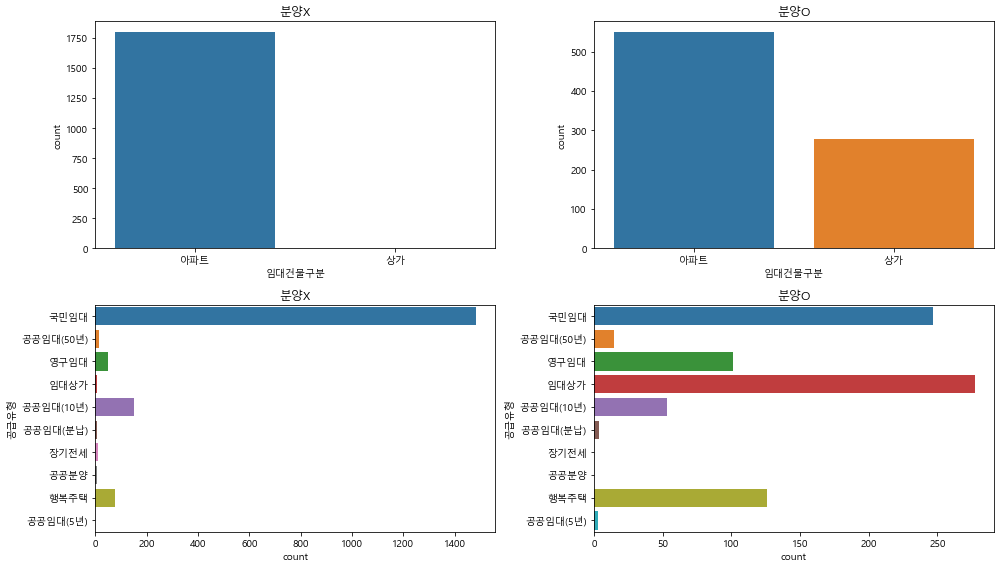

In [88]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2,nrows=2)
sns.countplot(train.loc[train.분양세대수==0,'임대건물구분'], ax=ax[0,0]).set_title("분양X")
sns.countplot(train.loc[train.분양세대수>0,'임대건물구분'], ax=ax[0,1]).set_title("분양O")
sns.countplot(data=train.loc[train.분양세대수==0,],y='공급유형',ax=ax[1,0],order=train['공급유형'].unique()).set_title("분양X")
sns.countplot(data=train.loc[train.분양세대수>0,],y='공급유형',ax=ax[1,1],order=train['공급유형'].unique()).set_title("분양O")
plt.tight_layout()
plt.show()

#### 분양세대수
못 써먹는다...

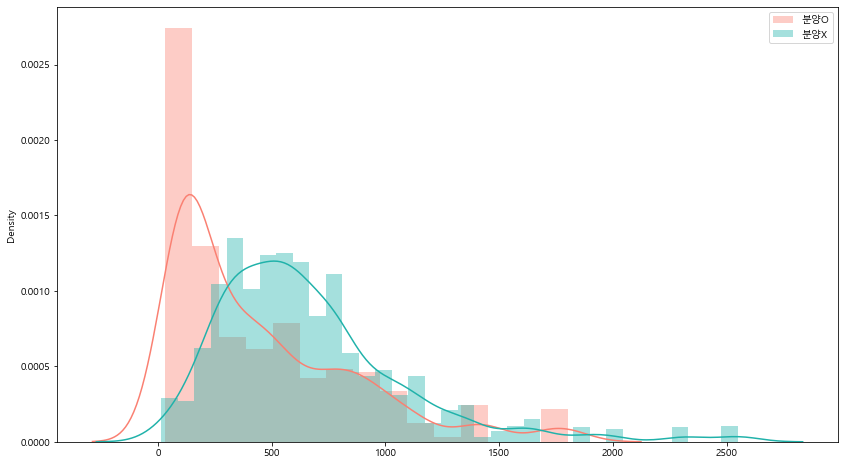

In [89]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(train.loc[train.분양세대수>0,"등록차량수"], label="분양O", color="salmon")
sns.distplot(train.loc[train.분양세대수==0,"등록차량수"], label="분양X", color="lightseagreen")
plt.xlabel('')
plt.legend()
plt.show()

In [90]:
del train['분양세대수']

### 단지내주차면수
target과의 correlation이 높은 변수

▶ <font color="red">총세대수:주차면수 column 추가</font>

In [91]:
train.corr()["등록차량수"].abs().sort_values(ascending=False)

등록차량수       1.0000
단지내주차면수     0.8513
임대료         0.4342
총세대수        0.4237
자격유형_카테고리   0.4043
자격유형7       0.4042
상가비율        0.4031
임대보증금       0.3586
자격유형8       0.3542
자격유형1       0.3065
전용면적별세대수    0.1889
자격유형2       0.1550
자격유형6       0.1347
자격유형4       0.1260
버스정류장       0.1193
공가수         0.0955
자격유형5       0.0813
전용면적        0.0811
지하철역        0.0778
자격유형3       0.0612
Name: 등록차량수, dtype: float64

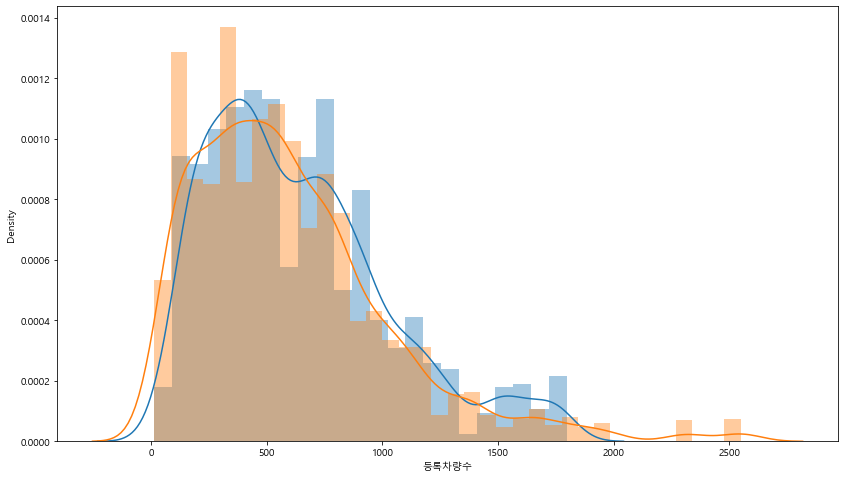

In [92]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(train['단지내주차면수'])
sns.distplot(train['등록차량수'])
plt.show()

#### 총세대수:주차면수

In [93]:
train['총세대수:주차면수'] = train['총세대수']/train['단지내주차면수']
test['총세대수:주차면수'] = test['총세대수']/test['단지내주차면수']

In [94]:
train.drop(['단지코드'],1,).corr()["등록차량수"].abs().sort_values(ascending=False)

등록차량수       1.0000
단지내주차면수     0.8513
총세대수:주차면수   0.4360
임대료         0.4342
총세대수        0.4237
자격유형_카테고리   0.4043
자격유형7       0.4042
상가비율        0.4031
임대보증금       0.3586
자격유형8       0.3542
자격유형1       0.3065
전용면적별세대수    0.1889
자격유형2       0.1550
자격유형6       0.1347
자격유형4       0.1260
버스정류장       0.1193
공가수         0.0955
자격유형5       0.0813
전용면적        0.0811
지하철역        0.0778
자격유형3       0.0612
Name: 등록차량수, dtype: float64

### 전용면적
주택법상 주택건설기준에 따라 전용면적 85㎡ 이하 1가구당 주차장 1면을 설치해야 함 <br>
대형 면적인 85㎡ 초과 세대의 경우 전용면적 기준은 70㎡당 1면

▶<font color="red">대형전용면적 column 추가</font> <br>

▶<font color="red">전용면적_카테고리 column 추가</font> 

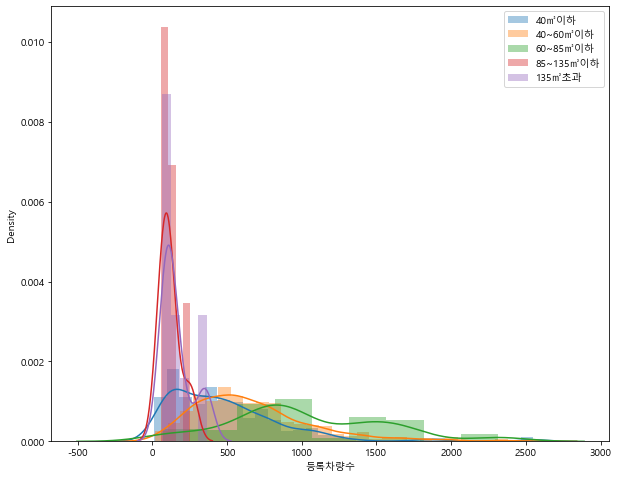

In [95]:
plt.rcParams["figure.figsize"] = (10,8)
sns.distplot(train.loc[train.전용면적<=40,'등록차량수'],label="40㎡이하")
sns.distplot(train.loc[(train.전용면적>40)&(train.전용면적<=60),'등록차량수'],label="40~60㎡이하")
sns.distplot(train.loc[(train.전용면적>60)&(train.전용면적<=85),'등록차량수'],label="60~85㎡이하")
sns.distplot(train.loc[(train.전용면적>85)&(train.전용면적<=135),'등록차량수'],label="85~135㎡이하")
sns.distplot(train.loc[(train.전용면적>135),'등록차량수'],label="135㎡초과")
plt.legend()
plt.show()

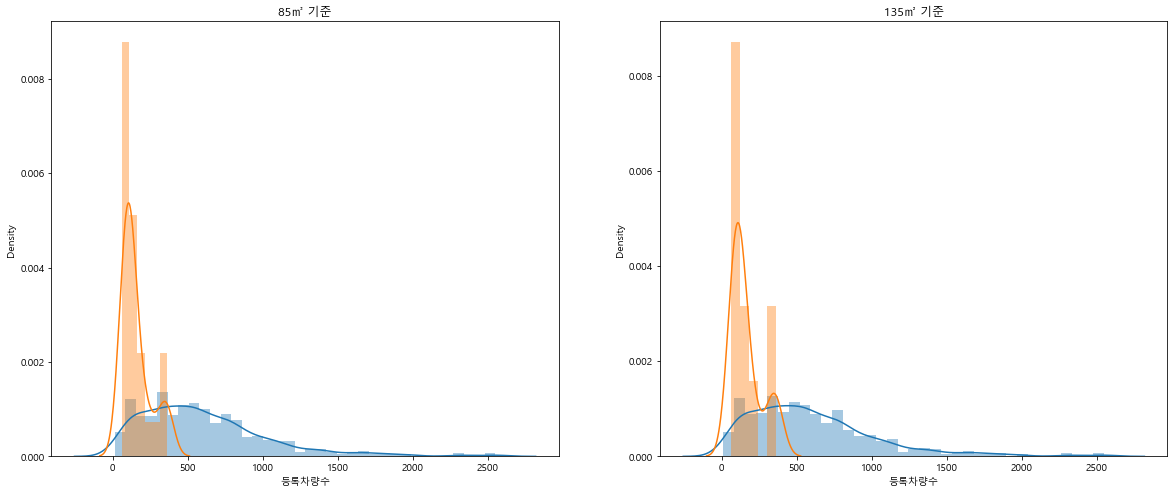

In [96]:
plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots(ncols=2)
level = 85
sns.distplot(train.loc[train.전용면적<=level,'등록차량수'], ax=ax[0]).set_title(f"{level}㎡ 기준")
sns.distplot(train.loc[train.전용면적>level,'등록차량수'], ax=ax[0])

level = 135
sns.distplot(train.loc[train.전용면적<=level,'등록차량수'], ax=ax[1]).set_title(f"{level}㎡ 기준")
sns.distplot(train.loc[train.전용면적>level,'등록차량수'], ax=ax[1])
plt.show()

#### 대형전용면적
85㎡를 초과하는 건물은 대형건물로 분류

- train set

In [97]:
level = 85
train['대형전용면적'] = 0
train.loc[train.전용면적>level, '대형전용면적'] = 1
train.loc[train.전용면적<=level, '대형전용면적'] = 0

- test set

In [98]:
level = 85
test['대형전용면적'] = 0
test.loc[test.전용면적>level, '대형전용면적'] = 1
test.loc[test.전용면적<=level, '대형전용면적'] = 0

#### 전용면적_카테고리
100㎡를 초과하는 건물은 outlier로 간주 & 10㎡ 단위로 범주화
- train set

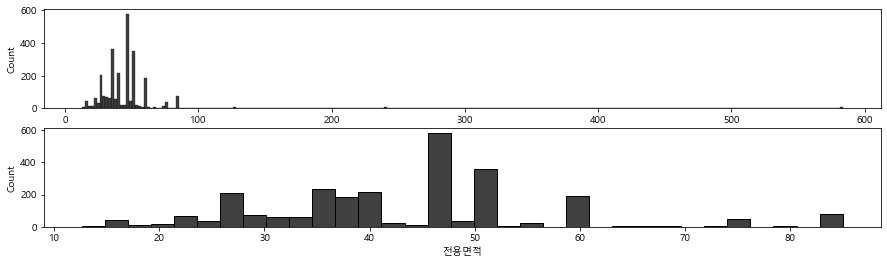

In [99]:
tmp = train[train['전용면적']<100]
plt.rcParams["figure.figsize"] = (10,8)
fig,ax = plt.subplots(2,1,figsize=(15,4))
sns.histplot(data=train, x='전용면적',color='black',ax=ax[0])
sns.histplot(data=tmp,x='전용면적',color='black',ax=ax[1])
plt.show()

In [100]:
train[train['전용면적']<100].groupby('단지코드').std()['전용면적'].mean()

6.94063913683481

In [101]:
def category(x):
    for ind,i in enumerate(list(range(10,110,5))): #0부터 100까지 10단위
        if int(x) in range(i-10,i): return ind
    for ind,i in enumerate(list(range(100,600,100))):#100부터 600까지 100단위
        if int(x) in range(i,i+100): return 10+ind

In [102]:
train['전용면적_카테고리'] = train['전용면적'].apply(lambda x : category(x))

In [103]:
for i in train['전용면적_카테고리']:
    train['전용면적'+str(i)] = 0

In [104]:
sample = pd.DataFrame(train.groupby('단지코드')['전용면적_카테고리'].unique()).reset_index()
sample.head()

,단지코드,전용면적_카테고리
0,C1000,"[6, 8, 9]"
1,C1004,"[6, 2, 1, 3, 4, 5, 9, 11]"
2,C1005,"[9, 10]"
3,C1013,"[6, 8, 9]"
4,C1014,"[5, 8, 9, 10]"


In [105]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val = sample.loc[i,'전용면적_카테고리']
    ind = train[train['단지코드']==code].index
    for j in val:
        train.loc[ind,'전용면적'+str(j)] = 1

- test set

In [106]:
test['전용면적_카테고리'] = test['전용면적'].apply(lambda x : category(x))
for i in test['전용면적_카테고리']:
    test['전용면적'+str(i)] = 0
sample = pd.DataFrame(test.groupby('단지코드')['전용면적_카테고리'].unique()).reset_index()
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val = sample.loc[i,'전용면적_카테고리']
    ind = test[test['단지코드']==code].index
    for j in val:
        test.loc[ind,'전용면적'+str(j)] = 1

### 지하철역 & 버스정류장
▶ <font color="red">그냥 0으로 대체?</font>

▶ 충청남도, 경상남도는 모두 0으로 채우고 대전은 생각해볼 것

In [107]:
check_NA(train)
check_NA(test)

NA check
지하철역 155 -> 5.889 %
버스정류장 4 -> 0.152 %
NA check
지하철역 34 -> 3.583 %


In [108]:
print(train.loc[train.지하철역.isna(),'지역'].value_counts())

충청남도     82
대전광역시    69
경상남도      4
Name: 지역, dtype: int64


In [109]:
print(train.loc[train.버스정류장.isna(),'지역'].value_counts())

경상남도    4
Name: 지역, dtype: int64


#### NA imputation
**우선 0으로 대체**

In [110]:
cols = ['지하철역','버스정류장']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

In [111]:
check_NA(train)
check_NA(test)

NA check
...There's no NA
NA check
...There's no NA


### 등록차량수 - target

In [112]:
train['등록차량수'].describe()

count   2,632.0000
mean      600.8431
std       431.6307
min        13.0000
25%       296.0000
50%       520.0000
75%       795.0000
max     2,550.0000
Name: 등록차량수, dtype: float64

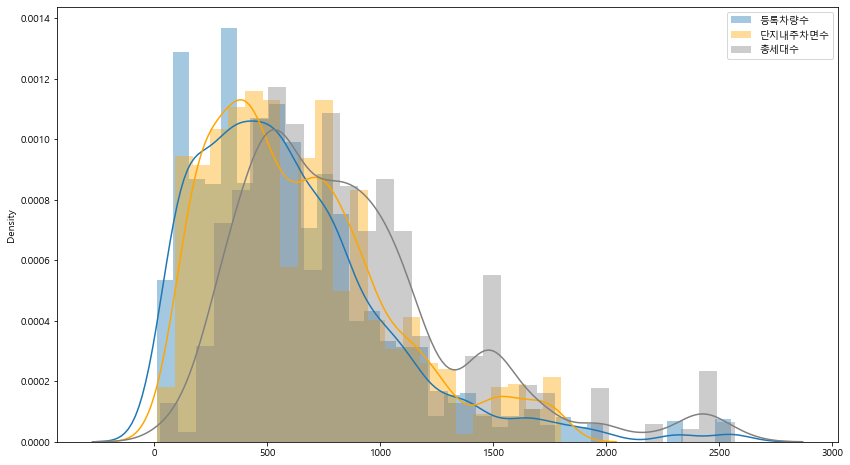

In [113]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(a=train['등록차량수'], label='등록차량수')
sns.distplot(a=train['단지내주차면수'], label='단지내주차면수',color="orange")
sns.distplot(a=train['총세대수'], hist = True, label='총세대수',color="gray")
plt.xlabel('')
plt.legend()
plt.show()

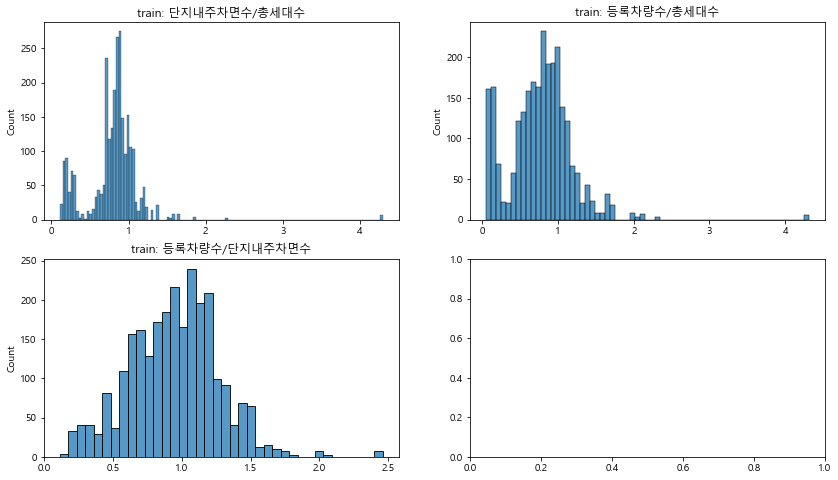

In [114]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.histplot(train.단지내주차면수/train.총세대수, ax=ax[0,0]).set_title("train: 단지내주차면수/총세대수")
sns.histplot(train.등록차량수/train.총세대수, ax=ax[0,1]).set_title("train: 등록차량수/총세대수")
sns.histplot(train.등록차량수/train.단지내주차면수, ax=ax[1,0]).set_title("train: 등록차량수/단지내주차면수")
# sns.histplot(test.단지내주차면수/test.총세대수, ax=ax[1,0]).set_title("test: 단지내주차면수/총세대수")
# sns.histplot(test.등록차량수/test.총세대수, ax=ax[1,1]).set_title("test: 등록차량수/총세대수")
plt.show()

# Preprocess

## 외부데이터 추가
### 지역별 남녀 인구수 & 승용차수
▶ train & test에는 인천광역시 X

In [115]:
car = read_file('인구수_자동차수.csv')
car

...There are no duplicates
shape of 인구수_자동차수.csv: (17, 4)


,지역,남자인구수,여자인구수,승용차수
0,서울특별시,4654720,4920635,2711984
1,부산광역시,1648965,1718369,1189345
2,대구광역시,1184977,1217963,1027075
3,인천광역시,1470528,1465854,1426203
4,광주광역시,714101,729053,576366
5,대전광역시,727279,729882,576906
6,울산광역시,579316,547859,486959
7,세종특별자치시,180778,181258,4966689
8,경기도,6789327,6699583,153330
9,강원도,772893,762598,617377


In [116]:
car = car.loc[car.지역!="인천광역시"]
car

,지역,남자인구수,여자인구수,승용차수
0,서울특별시,4654720,4920635,2711984
1,부산광역시,1648965,1718369,1189345
2,대구광역시,1184977,1217963,1027075
4,광주광역시,714101,729053,576366
5,대전광역시,727279,729882,576906
6,울산광역시,579316,547859,486959
7,세종특별자치시,180778,181258,4966689
8,경기도,6789327,6699583,153330
9,강원도,772893,762598,617377
10,충청북도,809946,787009,672910


In [117]:
남자총인구=car.남자인구수.sum()
여자총인구=car.여자인구수.sum()

In [118]:
car.남자인구수=car.남자인구수/남자총인구
car.여자인구수=car.여자인구수/여자총인구

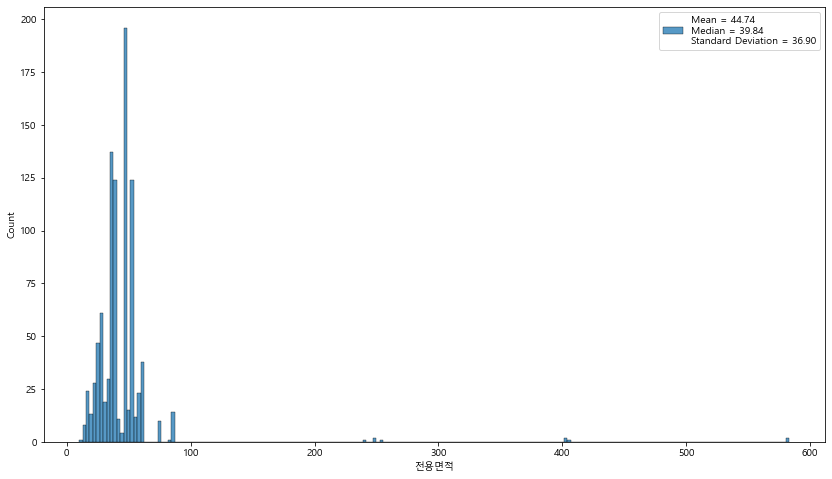

In [119]:
plt.rcParams["figure.figsize"] = (14,8)
label_='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%test["전용면적"].mean(),test["전용면적"].median(), "%.2f"%test["전용면적"].std())
sns.histplot(x=test["전용면적"], label=label_).legend(loc='best',fontsize=10)
plt.show()

## 데이터 병합

In [120]:
train.shape, test.shape

((2632, 43), (949, 42))

In [121]:
train = pd.merge(train, age_gender, on='지역', how='outer')
train = pd.merge(train, car, on='지역', how='outer')

test = pd.merge(test, age_gender.loc[age_gender.지역!="서울특별시",:], on='지역', how='outer')
test = pd.merge(test, car.loc[car.지역!="서울특별시",:], on='지역', how='outer')

In [122]:
train.shape, test.shape

((2632, 68), (949, 67))

In [123]:
check_NA(train)
check_NA(test)

NA check
...There's no NA
NA check
...There's no NA


## 추가) 단지내주차면수를 기준으로 데이터를 분할

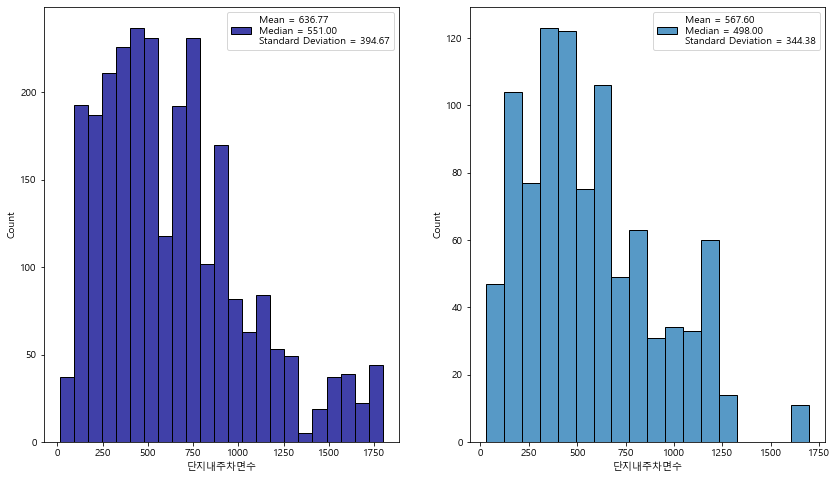

In [124]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax = plt.subplots(ncols=2)
label_=f"Mean = {train['단지내주차면수'].mean():.2f}\nMedian = {train['단지내주차면수'].median():.2f}\nStandard Deviation = {train['단지내주차면수'].std():.2f}"
sns.histplot(x=train["단지내주차면수"],color="darkblue", label=label_, ax=ax[0]).legend(loc='best',fontsize=10)

label_=f"Mean = {test['단지내주차면수'].mean():.2f}\nMedian = {test['단지내주차면수'].median():.2f}\nStandard Deviation = {test['단지내주차면수'].std():.2f}"
sns.histplot(x=test["단지내주차면수"], label=label_, ax=ax[1]).legend(loc='best',fontsize=10)
plt.show()

In [125]:
pd.DataFrame(train["단지내주차면수"].unique()).describe()

,0
count,355.0000
mean,617.9465
std,378.8537
min,13.0000
25%,331.5000
50%,548.0000
75%,849.0000
max,"1,798.0000"


In [126]:
pd.DataFrame(test["단지내주차면수"].unique()).describe()

,0
count,143.0000
mean,562.8112
std,321.3673
min,29.0000
25%,318.0000
50%,516.0000
75%,743.5000
max,"1,696.0000"


In [127]:
q1=train['단지내주차면수'].quantile(q=0.25, interpolation='nearest')
q3=train['단지내주차면수'].quantile(q=0.75, interpolation='nearest')

In [128]:
train['class_']=0
test['class_']=0

In [129]:
train['class_'].loc[train['단지내주차면수'] <q1]=1
train['class_'].loc[(train['단지내주차면수']>=q1) & (train['단지내주차면수']<q3)]=2 
train['class_'].loc[train['단지내주차면수']>=q3]=3

In [130]:
test['class_'].loc[test['단지내주차면수'] <q1]=1
test['class_'].loc[(test['단지내주차면수']>=q1) & (test['단지내주차면수']<q3)]=2 
test['class_'].loc[test['단지내주차면수']>=q3]=3

In [131]:
train_low=train[train.class_==1]
train_med=train[train.class_==2]
train_high=train[train.class_==3]

In [132]:
test_low=test[test.class_==1]
test_med=test[test.class_==2]
test_high=test[test.class_==3]